# OBESITY RISK PREDICTOR CLINICAL DECISION SUPPORT SYSTEM

## The Obesity Risk Predictor is a project to design a Clinical Decision Support System to predict obesity risk. It entails designing a machine learning model using Autogluon and integrating a web-based interactive user interface (UI) called "Clinician-in-the-loop" where users (Clinicians) can interact with the model and also see detailed predictions with accuracy and explainable AI display. This will enhance user understanding.

## Requirements

* autogluon==1.1.0
* pandas>=2.0.0
* numpy>=1.24.0
* scikit-learn>=1.3.0
* xgboost>=2.0.0
* lightgbm>=4.0.0
* catboost>=1.2.5
* streamlit>=1.37.0
* shap>=0.45.0
* matplotlib>=3.8.0
* joblib>=1.3.0
* kaggle>=1.6.14

## Install relevant libraries

In [ ]:
!pip install xgboost
!pip install lightgbm
!pip install catboost
!pip install shap
!pip install joblib
!pip install kaggle

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.9 MB/s eta 0:00:00


In [1]:
!pip install autogluon --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 23.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking

## Mount Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load dataset from kaggle using json

Download the json access file from Kaggle to enable me access the dataset

In [4]:
import json

# json file path
file_path = '/content/drive/MyDrive/kaggle_obp.json'

try:
    with open(file_path, 'r') as f:
        kaggle_creds = json.load(f)
        print("Your Kaggle username and key are:")
        print(f"Username: {kaggle_creds.get('username')}")
        print(f"Key: {kaggle_creds.get('key')}")
except FileNotFoundError:
    print(f"Error: The file {file_path} was not found.")
except json.JSONDecodeError:
    print(f"Error: Could not decode JSON from the file {file_path}.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Your Kaggle username and key are:
Username: frederickdamptey
Key: 1c5922e60e3738473c6577a1a84f598d


In [5]:
import os
from pathlib import Path

# json source path in Google Drive and the target path for Kaggle config
source_path = Path('/content/drive/MyDrive/kaggle_obp.json')
kaggle_dir = Path("/root/.kaggle")
kaggle_json_target_path = kaggle_dir / "kaggle.json"

# Create the .kaggle directory if it doesn't exist
kaggle_dir.mkdir(parents=True, exist_ok=True)

# Check if the source file exists in Google Drive
if source_path.exists():
    # Copy the kaggle.json file to the .kaggle directory
    # Use shutil.copy to preserve the original file in Drive
    import shutil
    shutil.copy(source_path, kaggle_json_target_path)
    print(f"Copied {source_path} to {kaggle_json_target_path}")

    # Permissions for the kaggle.json file
    os.chmod(kaggle_json_target_path, 0o600)
    print(f"Set permissions for {kaggle_json_target_path}")

    # Test kaggle command
    # !kaggle datasets list
else:
    print(f"Error: {source_path} not found in your Google Drive.")

Copied /content/drive/MyDrive/kaggle_obp.json to /root/.kaggle/kaggle.json
Set permissions for /root/.kaggle/kaggle.json


### Download obesity risk predictor dataset from Kaggle

In [6]:
!kaggle datasets download -d jpkochar/obesity-risk-dataset

Dataset URL: https://www.kaggle.com/datasets/jpkochar/obesity-risk-dataset
License(s): MIT
  0% 0.00/524k [00:00<?, ?B/s]
100% 524k/524k [00:00<00:00, 1.03GB/s]


## Unzip and display the dataset as df

In [7]:
import pandas as pd
import zipfile
import os

dataset_name = "obesity-risk-dataset"

# Unzip the dataset
zip_file_path = f'{dataset_name}.zip'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall()

# Assuming the unzipped file is a CSV with the same name as the dataset
csv_file_path = 'obesity_level.csv'

if os.path.exists(csv_file_path):
    df = pd.read_csv(csv_file_path)
    print(f"Successfully loaded {csv_file_path} into a DataFrame.")
    display(df.head())
else:
    print(f"Error: {csv_file_path} not found after unzipping.")

Successfully loaded obesity_level.csv into a DataFrame.


,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,0be1dad
0,0,Male,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,Sometimes,0,2.763573,0,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,Frequently,0,2.000000,0,1.000000,1.000000,0,Automobile,0rmal_Weight
2,2,Female,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,Sometimes,0,1.910378,0,0.866045,1.673584,0,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,Sometimes,0,1.674061,0,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,Sometimes,0,1.979848,0,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


## Dataset Exploration

Display DataFrame information

In [8]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  int64  
 6   FAVC                            20758 non-null  int64  
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  int64  
 11  CH2O                            20758 non-null  float64
 12  SCC                             

None

## Data Preprocessing

After exploring and obtaining information on the dataset, we drop the 'id' column which is unimportant for our prediction, define features and label, correct mispelts column name and and perform train_test splits. Since AutoGluon accepts raw data input for modeling due to some models requiring non-standardized data inputs, the train_test sets are reconverted to DataFrames and passed to AutoGluon machine learning framework.

### Drop the column 'id' and re-display column info

In [9]:
# Drop the column 'id' since it has no effect on predictions
if 'id' in df.columns:
    df = df.drop(columns=['id'])
    print("Dropped 'id' column.")
else:
    print("No 'id' column found to drop.")

display(df.info())


Dropped 'id' column.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          20758 non-null  object 
 1   Age                             20758 non-null  float64
 2   Height                          20758 non-null  float64
 3   Weight                          20758 non-null  float64
 4   family_history_with_overweight  20758 non-null  int64  
 5   FAVC                            20758 non-null  int64  
 6   FCVC                            20758 non-null  float64
 7   NCP                             20758 non-null  float64
 8   CAEC                            20758 non-null  object 
 9   SMOKE                           20758 non-null  int64  
 10  CH2O                            20758 non-null  float64
 11  SCC                             20758 non-null  int64  
 12  FAF        

None

## Define features and label

In [10]:
# Separate features and target
X = df.drop('0be1dad', axis=1)            # Features
y = df['0be1dad']                         # Label

# Print the number of unique classes
print("Number of classes:", y.nunique())

# Print class names
print("Classes:")
for cls in y.unique():
    print("-", cls)


Number of classes: 7
Classes:
- Overweight_Level_II
- 0rmal_Weight
- Insufficient_Weight
- Obesity_Type_III
- Obesity_Type_II
- Overweight_Level_I
- Obesity_Type_I


### Correct "Normal_Weight" misspelt class name

In [11]:
# Correct misspellled label spelling "0rmal_Weight" to "Normal_Weight"
y = y.replace("0rmal_Weight", "Normal_Weight")


## Data splitting

Split dataset into training and testing sets

In [12]:
# Import train_test_split module from sklearn
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print X and y shape
print("Shape of training features (X_train):", X_train.shape)
print("Shape of testing features (X_test):", X_test.shape)
print("Shape of training labels (y_train):", y_train.shape)
print("Shape of testing labels (y_test):", y_test.shape)


Shape of training features (X_train): (16606, 16)
Shape of testing features (X_test): (4152, 16)
Shape of training labels (y_train): (16606,)
Shape of testing labels (y_test): (4152,)


### Pie chart to show class distribution

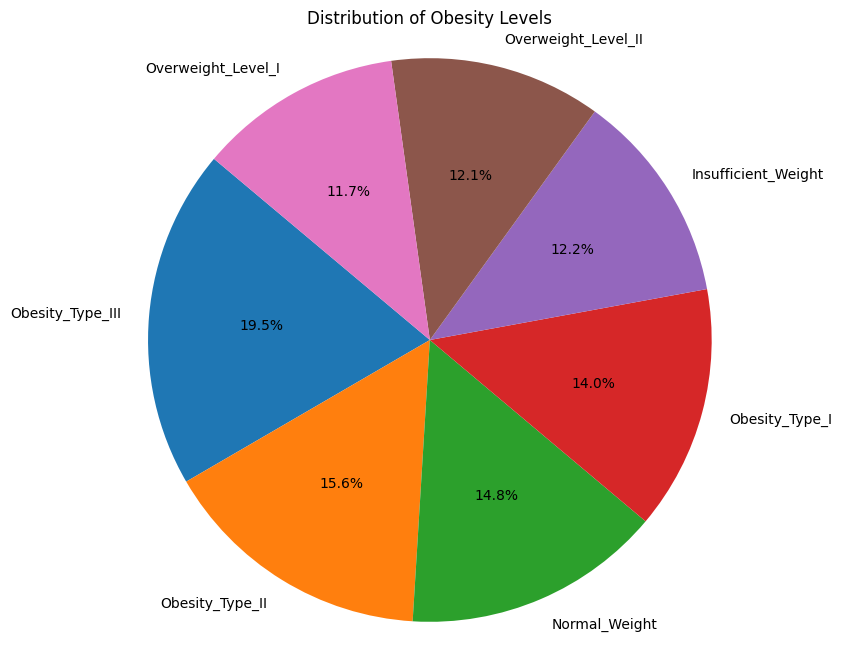

In [13]:
# Import matplotlib
import matplotlib.pyplot as plt

# Count the frequency of each label in the target variable 'y'
label_counts = y.value_counts()

# Create a new figure with a specified size
plt.figure(figsize=(8, 8))
# Plot a pie chart using the label counts
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Obesity Levels')   # Add a title to the plot
plt.axis('equal')
plt.show()

## Create a DataFrame for Train and Test sets to allow AutoGluon modeling

AutoGluon framework performs internal encoding, scaling and other relevant preprocessing of dataset for its prediction. Scaled and encoded data are seen as raw data. Due to this, raw or minimally processed data is fed to the model for training and testing.

X, y sets are reconverted to dataframes for Autogluon

In [14]:
# Specify "0be1dad" as the label column
LABEL = "0be1dad"

# Make sure y_train and y_test are Series with the correct name
y_train = pd.Series(y_train, name=LABEL)
y_test  = pd.Series(y_test,  name=LABEL)

# Combine features and label for train and test
# Training set df
train_df = pd.concat([X_train.reset_index(drop=True),
                      y_train.reset_index(drop=True)], axis=1)

# Test set df
test_df = pd.concat([X_test.reset_index(drop=True),
                     y_test.reset_index(drop=True)], axis=1)

# Print df shapes
print("train_df shape:", train_df.shape)
print("test_df shape :", test_df.shape)


train_df shape: (16606, 17)
test_df shape : (4152, 17)


## Training and Validation with AutoGluon.py

Using AutoGluon's TabularPredictor, Autogluon is trained on the training set. 3-fold CV is implemented to enhance predictions and reduce overfitting.

In [15]:
from autogluon.tabular import TabularPredictor

# Initialize the TabularPredictor with key parameters
predictor = TabularPredictor(
    label=LABEL,                      # Target column name
    problem_type="multiclass",        # Specified multiclass prediction task
    eval_metric="balanced_accuracy",  # use balanced_accuracy for evaluation
    sample_weight="balance_weight",
    weight_evaluation=False
).fit(
    train_data=train_df,     # contains both features and LABEL
    presets="best_quality",  # Use training fold with "best quality" metrics
    time_limit=3600,         # Set time limit for training
    num_bag_folds=3,         # 3-fold cross-validation for faster training
    num_bag_sets=1,
    refit_full=True,
    dynamic_stacking=False,   # Disable dynamic stacking to speed up training
    ag_args_gpu_idx=[0]       # Explicitly use the first GPU
)

No path specified. Models will be saved in: "AutogluonModels/ag-20251201_165626"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.4.0
Python Version:     3.12.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Thu Oct  2 10:42:05 UTC 2025
CPU Count:          12
Memory Avail:       164.01 GB / 167.05 GB (98.2%)
Disk Space Avail:   191.11 GB / 235.68 GB (81.1%)
Presets specified: ['best_quality']
Using hyperparameters preset: hyperparameters='zeroshot'
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=5, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_sta

## Testing Phase

Using the test_df, this phase performs a secondary testing on the training set and displays a classification report using Sklearn.

In [21]:
# Import relevant libraries
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# AutoGluon leaderboard on the held-out test set
leaderboard_df = predictor.leaderboard(test_df, silent=False)
display(leaderboard_df)

# Separate features and labels for manual metrics
X_test_only = test_df.drop(columns=[LABEL])
y_true = test_df[LABEL]

# Predictions from the trained model
y_pred = predictor.predict(X_test_only)

# Print the classification report
print("\nClassification report (test set):")
print(classification_report(y_true, y_pred))

                               model  score_test  score_val        eval_metric  pred_time_test  pred_time_val     fit_time  pred_time_test_marginal  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0                  LightGBMXT_BAG_L2    0.903820   0.897407  balanced_accuracy       20.288612      45.656187  1606.090827                 0.385448                0.677653          34.004819            2       True         28
1                    LightGBM_BAG_L2    0.903219   0.897439  balanced_accuracy       20.001654      45.155526  1615.501803                 0.098489                0.176992          43.415795            2       True         29
2                WeightedEnsemble_L3    0.902981   0.900266  balanced_accuracy       21.412203      47.687560  2056.709508                 0.009016                0.005402           4.032859            3       True         40
3         ExtraTreesGini_BAG_L2_FULL    0.902392        NaN  balanced_accuracy        5.793213  

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBMXT_BAG_L2,0.903820,0.897407,balanced_accuracy,20.288612,45.656187,1606.090827,0.385448,0.677653,34.004819,2,True,28
1,LightGBM_BAG_L2,0.903219,0.897439,balanced_accuracy,20.001654,45.155526,1615.501803,0.098489,0.176992,43.415795,2,True,29
2,WeightedEnsemble_L3,0.902981,0.900266,balanced_accuracy,21.412203,47.687560,2056.709508,0.009016,0.005402,4.032859,3,True,40
3,ExtraTreesGini_BAG_L2_FULL,0.902392,NaN,balanced_accuracy,5.793213,NaN,440.032878,0.264216,1.099251,1.347833,2,True,73
4,XGBoost_r33_BAG_L1_FULL,0.902232,NaN,balanced_accuracy,0.564366,NaN,6.907428,0.564366,NaN,6.907428,1,True,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,NeuralNetTorch_r79_BAG_L1_FULL,0.868925,NaN,balanced_accuracy,0.035451,NaN,25.501372,0.035451,NaN,25.501372,1,True,53
76,LightGBM_r188_BAG_L1,0.868249,0.859756,balanced_accuracy,0.928228,1.920326,7.101476,0.928228,1.920326,7.101476,1,True,25
77,LightGBM_r188_BAG_L1_FULL,0.867598,NaN,balanced_accuracy,0.195305,NaN,4.559187,0.195305,NaN,4.559187,1,True,65
78,NeuralNetFastAI_r191_BAG_L1_FULL,0.833088,NaN,balanced_accuracy,0.081609,NaN,29.601332,0.081609,NaN,29.601332,1,True,55



Classification report (test set):
                     precision    recall  f1-score   support

Insufficient_Weight       0.94      0.95      0.95       505
      Normal_Weight       0.90      0.88      0.89       617
     Obesity_Type_I       0.89      0.90      0.90       582
    Obesity_Type_II       0.97      0.97      0.97       650
   Obesity_Type_III       1.00      1.00      1.00       809
 Overweight_Level_I       0.81      0.77      0.79       485
Overweight_Level_II       0.81      0.83      0.82       504

           accuracy                           0.91      4152
          macro avg       0.90      0.90      0.90      4152
       weighted avg       0.91      0.91      0.91      4152



### Plot the confusion matrix for the best performing model, XGBoos_r89_BAG_L1

The best model according to the leaderboard is: LightGBMXT_BAG_L2


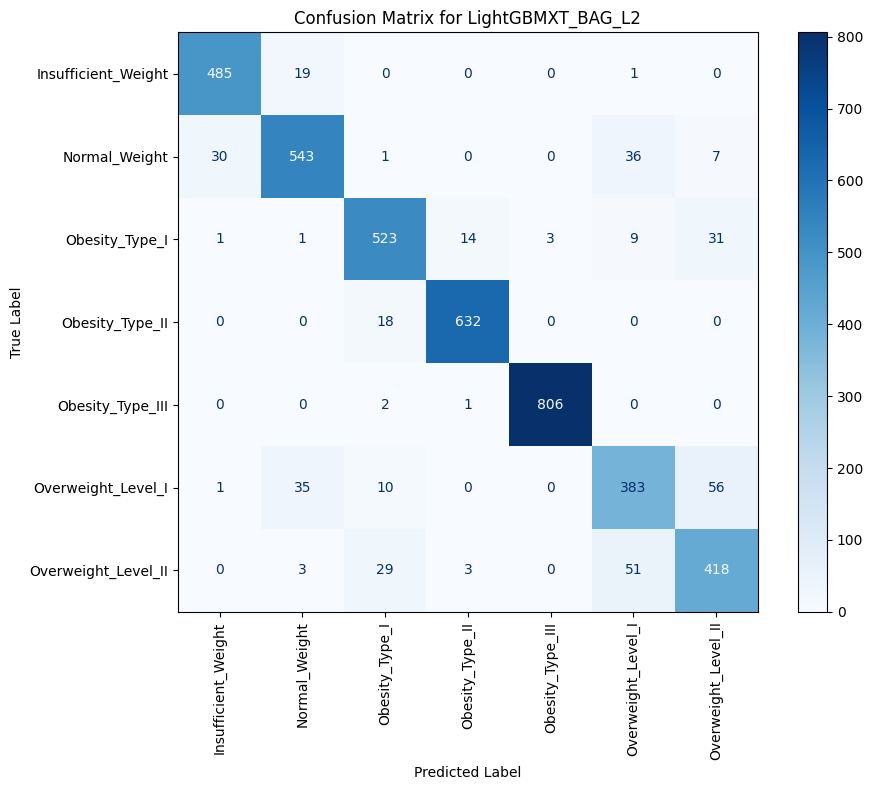

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay

# Get the best model name from the leaderboard
best_model_name = leaderboard_df.iloc[0]['model']
print(f"The best model according to the leaderboard is: {best_model_name}")

# Make predictions using the best model.
# The 'predictor' object itself is already configured to use the best model by default.
# If you specifically want to use the model identified by best_model_name,
# you can pass it to the 'model' argument of predict.
y_pred_best_model = predictor.predict(X_test_only, model=best_model_name)

# Plot the confusion matrix for the best model
fig, ax = plt.subplots(figsize=(10, 8))
ConfusionMatrixDisplay.from_predictions(y_true, y_pred_best_model, ax=ax, cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.title(f'Confusion Matrix for {best_model_name}')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

### Determine top 10 models

In [23]:
# Iterate through the leaderboard
leaderboard_df_sorted = leaderboard_df.sort_values(by='score_test', ascending=False)
top_10_models_df = leaderboard_df_sorted.head(10)
top_10_models = top_10_models_df['model'].tolist()

# Print top 10 models
print("Top 10 Models:")
for i, model in enumerate(top_10_models):
    print(f"{i+1}. {model}")


Top 10 Models:
1. LightGBMXT_BAG_L2
2. LightGBM_BAG_L2
3. WeightedEnsemble_L3
4. ExtraTreesGini_BAG_L2_FULL
5. XGBoost_r33_BAG_L1_FULL
6. LightGBMLarge_BAG_L2
7. XGBoost_r33_BAG_L1
8. CatBoost_r9_BAG_L1_FULL
9. XGBoost_BAG_L2
10. XGBoost_BAG_L1


## Confusion matrix plots for the top 10 models

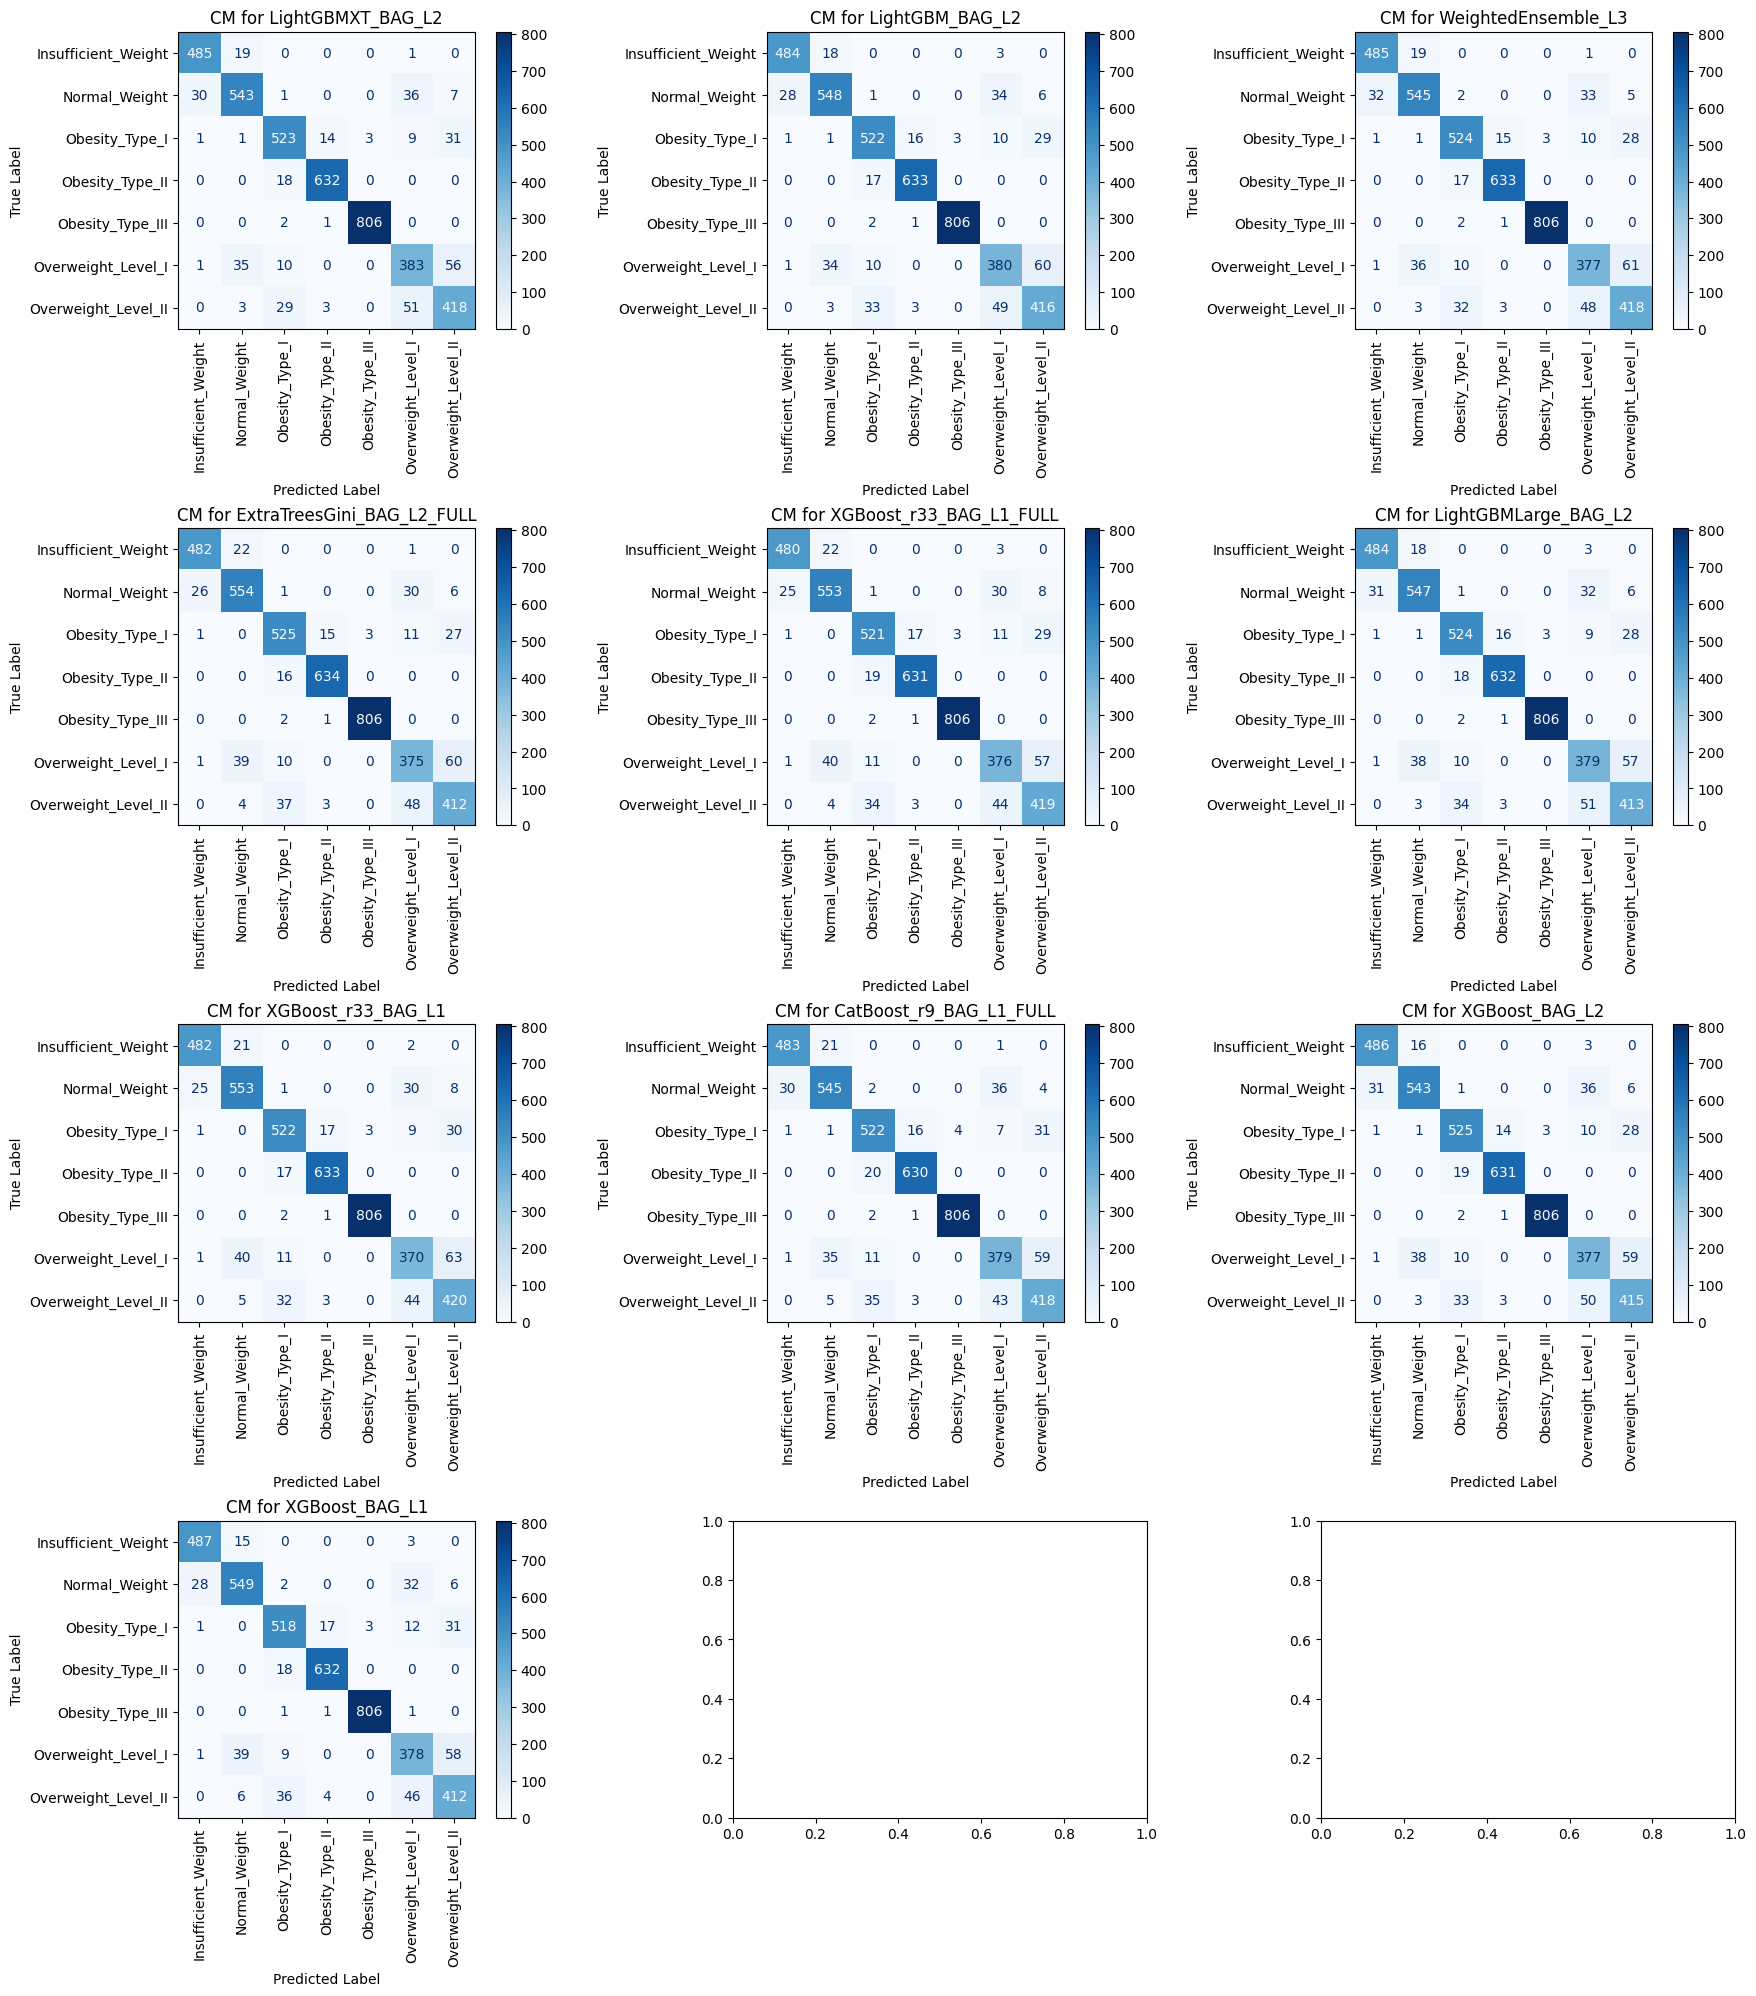

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import math

# Calculate the number of rows and columns for subplots
num_plots = len(top_10_models)
n_cols = 3  # Display 3 plots per row
n_rows = math.ceil(num_plots / n_cols)

# Create a grid of subplots with n_rows x n_cols layout
# figsize controls the overall size of the figure (width = n_cols*6, height = n_rows*5)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 5))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

# Loop through the top 10 models with their index
for i, model_name in enumerate(top_10_models):
    if i < len(axes):
        ax = axes[i]
        y_pred_model = predictor.predict(X_test_only, model=model_name)
        # Plot the confusion matrix for this model on the chosen subplot
        ConfusionMatrixDisplay.from_predictions(y_true, y_pred_model, ax=ax, cmap=plt.cm.Blues, xticks_rotation='vertical')
        # Add title and axis labels to the subplot
        ax.set_title(f'CM for {model_name}')
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('True Label')
    else:
        # Hide extra subplots if any
        fig.delaxes(axes[i])

# Plot matrices
plt.tight_layout()
plt.show()


### Generate and Plot Classification Reports for Top Models


For each of the top 10 models, generate predictions on the test set ('X_test_only') and display its classification report using 'sklearn.metrics.classification_report'. Each report will include the model's name.


In [25]:
# Loop through the 10 models and print classification report
for model_name in top_10_models:
    print(f"\nClassification Report for Model: {model_name}")
    y_pred_model = predictor.predict(X_test_only, model=model_name)
    print(classification_report(y_true, y_pred_model))


Classification Report for Model: LightGBMXT_BAG_L2
                     precision    recall  f1-score   support

Insufficient_Weight       0.94      0.96      0.95       505
      Normal_Weight       0.90      0.88      0.89       617
     Obesity_Type_I       0.90      0.90      0.90       582
    Obesity_Type_II       0.97      0.97      0.97       650
   Obesity_Type_III       1.00      1.00      1.00       809
 Overweight_Level_I       0.80      0.79      0.79       485
Overweight_Level_II       0.82      0.83      0.82       504

           accuracy                           0.91      4152
          macro avg       0.90      0.90      0.90      4152
       weighted avg       0.91      0.91      0.91      4152


Classification Report for Model: LightGBM_BAG_L2
                     precision    recall  f1-score   support

Insufficient_Weight       0.94      0.96      0.95       505
      Normal_Weight       0.91      0.89      0.90       617
     Obesity_Type_I       0.89      0.90

## Other metrics computation

This computes the AUC, sensitivity, specificity, PPV and NPV for  further evaluation

In [26]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Define the calculated multiclass_metrics
def calculate_multiclass_metrics(y_true, y_pred):
    labels = np.unique(y_true)
    cm = confusion_matrix(y_true, y_pred, labels=labels)

    metrics = {}
    for i, label in enumerate(labels):
        TP = cm[i, i]
        FP = np.sum(cm[:, i]) - TP
        FN = np.sum(cm[i, :]) - TP
        TN = np.sum(cm) - (TP + FP + FN)

        sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 0
        specificity = TN / (TN + FP) if (TN + FP) != 0 else 0
        ppv = TP / (TP + FP) if (TP + FP) != 0 else 0
        npv = TN / (TN + FN) if (TN + FN) != 0 else 0

        metrics[label] = {
            "True Positives": TP,
            "False Positives": FP,
            "False Negatives": FN,
            "True Negatives": TN,
            "Sensitivity (Recall)": sensitivity,
            "Specificity": specificity,
            "PPV (Precision)": ppv,
            "NPV": npv,
        }
    return metrics

print("The `calculate_multiclass_metrics` function has been defined.")

The `calculate_multiclass_metrics` function has been defined.


## Display performance metrics of top 10 test predictions in a dataframe

AUC, sensitivity, specificity, PPV and NPV metrics are computed and displayed for to 10 performing models in AutoGluon as a df

In [27]:
from sklearn.metrics import roc_auc_score
import pandas as pd

all_models_metrics = []

for model_name in top_10_models:
    y_pred_model = predictor.predict(X_test_only, model=model_name)
    metrics_per_class = calculate_multiclass_metrics(y_true, y_pred_model)

    # Prepare for AUC calculation from the test leaderboard
    y_proba_model = predictor.predict_proba(X_test_only, model=model_name)

    # Ensure the order of classes for roc_auc_score matches the probability columns
    # If y_true is categorical, convert it to numerical labels for consistent comparison
    # Get all possible classes from y_true and y_pred to define consistent labels
    all_classes = sorted(np.unique(np.concatenate((y_true, y_pred_model))))

    # Calculate multiclass AUC score
    # Autogluon's predict_proba typically returns columns in sorted order of class labels
    try:
        multiclass_auc = roc_auc_score(y_true, y_proba_model, multi_class='ovr', average='weighted', labels=all_classes)
    except ValueError as e:
        print(f"Could not calculate AUC for model {model_name}: {e}. Setting AUC to NaN.")
        multiclass_auc = float('nan')

    # Store aggregated metrics for the model
    model_summary = {"Model": model_name, "Multiclass AUC": multiclass_auc}
    for class_label, class_metrics in metrics_per_class.items():
        model_summary[f"{class_label}_Sensitivity"] = class_metrics["Sensitivity (Recall)"]
        model_summary[f"{class_label}_Specificity"] = class_metrics["Specificity"]
        model_summary[f"{class_label}_PPV"] = class_metrics["PPV (Precision)"]
        model_summary[f"{class_label}_NPV"] = class_metrics["NPV"]

    all_models_metrics.append(model_summary)

# Create a DataFrame from the collected metrics
metrics_df = pd.DataFrame(all_models_metrics)

print("Calculated metrics for all top models:")
display(metrics_df)


Calculated metrics for all top models:


,Model,Multiclass AUC,Insufficient_Weight_Sensitivity,Insufficient_Weight_Specificity,Insufficient_Weight_PPV,Insufficient_Weight_NPV,Normal_Weight_Sensitivity,Normal_Weight_Specificity,Normal_Weight_PPV,Normal_Weight_NPV,...,Obesity_Type_III_PPV,Obesity_Type_III_NPV,Overweight_Level_I_Sensitivity,Overweight_Level_I_Specificity,Overweight_Level_I_PPV,Overweight_Level_I_NPV,Overweight_Level_II_Sensitivity,Overweight_Level_II_Specificity,Overweight_Level_II_PPV,Overweight_Level_II_NPV
0,LightGBMXT_BAG_L2,0.991364,0.960396,0.991226,0.938104,0.994498,0.880065,0.983593,0.903494,0.979161,...,0.996292,0.999103,0.789691,0.973548,0.797917,0.972222,0.829365,0.974232,0.816406,0.976374
1,LightGBM_BAG_L2,0.990861,0.958416,0.991774,0.941634,0.994228,0.888169,0.984158,0.907285,0.980552,...,0.996292,0.999103,0.783505,0.973821,0.798319,0.971436,0.825397,0.973958,0.814090,0.975831
2,WeightedEnsemble_L3,0.992028,0.960396,0.990677,0.934489,0.994495,0.883306,0.983310,0.902318,0.979707,...,0.996292,0.999103,0.777320,0.974911,0.803838,0.970676,0.829365,0.974232,0.816406,0.976374
3,ExtraTreesGini_BAG_L2_FULL,0.990488,0.954455,0.992322,0.945098,0.993685,0.897893,0.981612,0.894992,0.982168,...,0.996292,0.999103,0.773196,0.975457,0.806452,0.970165,0.817460,0.974507,0.815842,0.974774
4,XGBoost_r33_BAG_L1_FULL,0.991461,0.950495,0.992597,0.946746,0.993141,0.896272,0.981330,0.893376,0.981885,...,0.996292,0.999103,0.775258,0.976002,0.810345,0.970445,0.831349,0.974232,0.816764,0.976642
5,LightGBMLarge_BAG_L2,0.989349,0.958416,0.990951,0.936170,0.994223,0.886548,0.983027,0.901153,0.980254,...,0.996292,0.999103,0.781443,0.974093,0.799578,0.971180,0.819444,0.975055,0.819444,0.975055
6,XGBoost_r33_BAG_L1,0.991504,0.954455,0.992597,0.946955,0.993687,0.896272,0.981330,0.893376,0.981885,...,0.996292,0.999103,0.762887,0.976820,0.813187,0.968894,0.833333,0.972314,0.806142,0.976866
7,CatBoost_r9_BAG_L1_FULL,0.991991,0.956436,0.991226,0.937864,0.993951,0.883306,0.982461,0.897858,0.979690,...,0.995062,0.999102,0.781443,0.976275,0.813305,0.971243,0.829365,0.974232,0.816406,0.976374
8,XGBoost_BAG_L2,0.990716,0.962376,0.990951,0.936416,0.994770,0.880065,0.983593,0.903494,0.979161,...,0.996292,0.999103,0.777320,0.973002,0.792017,0.970620,0.823413,0.974507,0.816929,0.975576
9,XGBoost_BAG_L1,0.991621,0.964356,0.991774,0.941973,0.995048,0.889789,0.983027,0.901478,0.980807,...,0.996292,0.999103,0.779381,0.974366,0.800847,0.970924,0.817460,0.973958,0.812623,0.974760


## AUC-ROC curves of the top 10 performing models

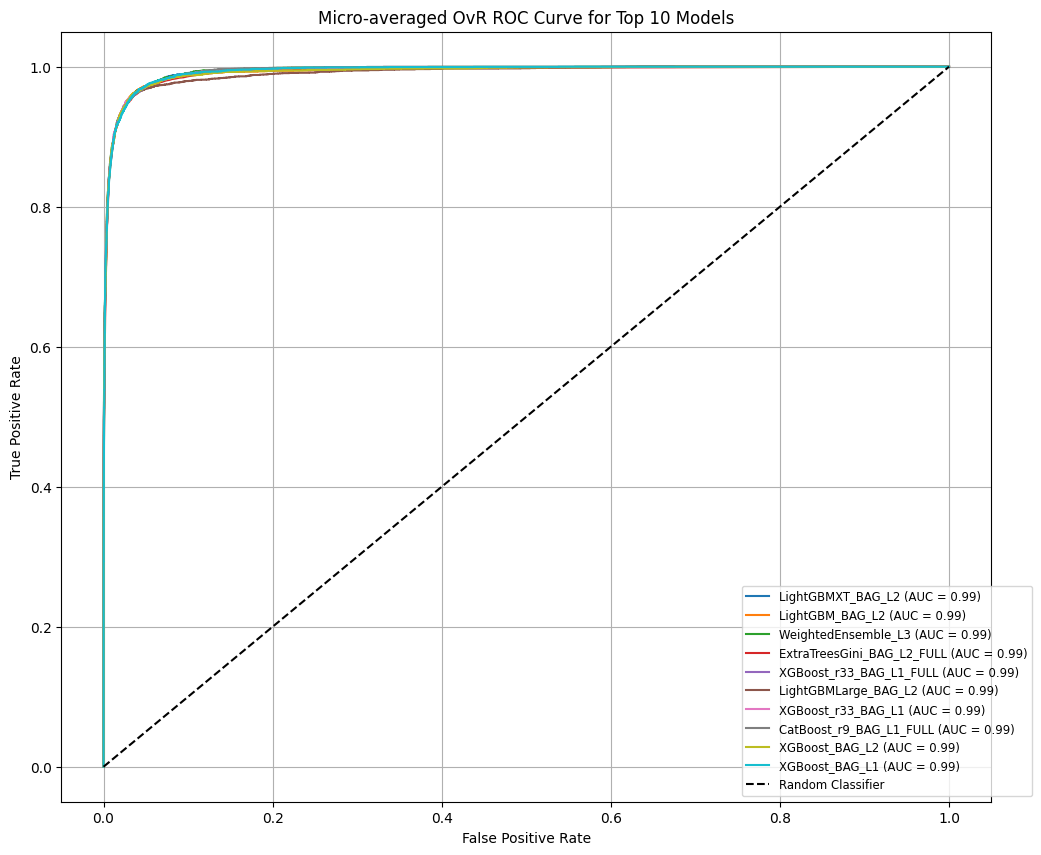

In [30]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import numpy as np

# Binarize the true labels for OvR ROC calculation
label_binarizer = LabelBinarizer()
y_true_binarized = label_binarizer.fit_transform(y_true)

plt.figure(figsize=(12, 10))

for model_name in top_10_models:
    # Obtain probability predictions for the current model
    y_proba_model = predictor.predict_proba(X_test_only, model=model_name)

    # Calculate micro-averaged ROC curve and AUC score
    # For micro-average, we treat each element of the label indicator matrix as a binary prediction
    fpr, tpr, _ = roc_curve(y_true_binarized.ravel(), y_proba_model.values.ravel())
    roc_auc_micro = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc_micro:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro-averaged OvR ROC Curve for Top 10 Models')
plt.legend(loc='lower right', bbox_to_anchor=(1.05, 0), fontsize='small')
plt.grid(True)
plt.show()

## Cohort Analysis

### Create Groups for Cohort Analysis

Five features - Age group, Gender, Family history of obesity, High calorie food intake and Avtivity level - are extracted for further cohort analysis. These features are factors which are known to influence patient outcomes and provide meaningful stratification across the study population.

In [43]:
# Specify the four cohorts

# Age group cohort
test_df["Age_Group"] = pd.cut(
    test_df["Age"],
    bins=[0, 20, 30, 40, 50, 60, 120],
    labels=["<21", "21–30", "31–40", "41–50", "60-70", "70+"],
    include_lowest=True
)

# Gender cohort
test_df["Gender"] = test_df["Gender"].map({"Male": "Male", "Female": "Female"})

# Family history of obesity cohort
test_df["FH_Obesity"] = test_df["family_history_with_overweight"].map({0: "No", 1: "Yes"})

# High Calorie Food Intake ("FAVC") cohort
test_df["High_Calorie_Intake"] = test_df["FAVC"].map({0: "No", 1: "Yes"})

# Activity Level ("FAF") cohort
test_df["Activity_Level"] = pd.cut(
    test_df["FAF"],
    bins=[-1, 0.5, 1.5, 2.5, 3.5],
    labels=["None", "Low", "Moderate", "High"]
)

### Compute the metrics of the cohorts

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np

LABEL_COL = "0be1dad"    # your true label column
PRED_COL  = "y_pred"     # predicted label column

def evaluate_cohort(df: pd.DataFrame, cohort_col: str, min_size: int = 5) -> pd.DataFrame:
    """
    Compute metrics per cohort value.

    df: DataFrame containing true labels, predictions, and cohort columns
    cohort_col: column name used to group the data (e.g., 'Age_Group')
    min_size: minimum number of samples required to compute metrics
    """
    results = []

    for value, grp in df.groupby(cohort_col):
        n = len(grp)
        if n < min_size:
            # skip very small cohorts to avoid unstable metrics
            continue

        # Explicitly convert to string type to avoid mixed-type comparison errors
        y_true = grp[LABEL_COL].astype(str)
        y_pred = grp[PRED_COL].astype(str)

        acc = accuracy_score(y_true, y_pred)
        prec = precision_score(y_true, y_pred, average="weighted", zero_division=0)
        rec  = recall_score(y_true, y_pred, average="weighted", zero_division=0)
        f1   = f1_score(y_true, y_pred, average="weighted", zero_division=0)

        results.append({
            cohort_col: value,
            "n_samples": n,
            "accuracy": acc,
            "precision_weighted": prec,
            "recall_weighted": rec,
            "f1_weighted": f1
        })

    return pd.DataFrame(results)

### Make predictions

In [49]:
# The predictor expects the same features it was trained on.
# X_test (from train_test_split) already contains these features and no target label.
# We just need to ensure the test_df has a 'y_pred' column for cohort analysis.

# Make predictions using the trained predictor on the original X_test features
test_df[PRED_COL] = predictor.predict(X_test)

### Display the metrics for "Age_Group" cohort

In [53]:
cohorts = ["Age_Group", "Gender", "FH_Obesity", "High_Calorie_Intake", "Activity_Level"]

cohort_results = {}

for c in cohorts:
    cohort_results[c] = evaluate_cohort(test_df, c)

# Example: view age cohort performance
print("Age group cohort metrics:")
display(cohort_results["Age_Group"])


/tmp/ipython-input-3548582154.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for value, grp in df.groupby(cohort_col):


Age group cohort metrics:


/tmp/ipython-input-3548582154.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for value, grp in df.groupby(cohort_col):


,Age_Group,n_samples,accuracy,precision_weighted,recall_weighted,f1_weighted
0,<21,1152,0.032118,0.301045,0.032118,0.055458
1,21–30,2430,0.030453,0.169373,0.030453,0.051084
2,31–40,491,0.026477,0.269263,0.026477,0.045557
3,41–50,64,0.031250,0.250000,0.031250,0.054174
4,60-70,13,0.000000,0.000000,0.000000,0.000000


### Display the metrics for "Gender" cohort

In [56]:
print("\n===== Gender Cohort Metrics =====")

gender_results = cohort_results.get("Gender")

if gender_results is None or gender_results.empty:
    print("No valid metrics for Gender cohort (column missing or too few samples).")
else:
    display(gender_results)


===== Gender Cohort Metrics =====


,Gender,n_samples,accuracy,precision_weighted,recall_weighted,f1_weighted
0,Female,2080,0.028846,0.232332,0.028846,0.050109
1,Male,2072,0.031853,0.223677,0.031853,0.055321


### Display the metrics for "FH_Oobesisity" cohort

In [57]:
print("\n===== Family History Cohort Metrics =====")

fh_results = cohort_results.get("FH_Obesity")

if fh_results is None or fh_results.empty:
    print("No valid metrics for FH_Obesity cohort (column missing or too few samples).")
else:
    display(fh_results)



===== Family History Cohort Metrics =====


,FH_Obesity,n_samples,accuracy,precision_weighted,recall_weighted,f1_weighted
0,No,733,0.024557,0.427908,0.024557,0.046381
1,Yes,3419,0.031588,0.165874,0.031588,0.052695


### Display the metrics for "FAVC" cohort

In [58]:
print("\n===== High Calorie Intake Cohort Metrics =====")

calorie_results = cohort_results.get("High_Calorie_Intake")

if calorie_results is None or calorie_results.empty:
    print("No valid metrics for High_Calorie_Intake cohort.")
else:
    display(calorie_results)



===== High Calorie Intake Cohort Metrics =====


,High_Calorie_Intake,n_samples,accuracy,precision_weighted,recall_weighted,f1_weighted
0,No,360,0.030556,0.356061,0.030556,0.056086
1,Yes,3792,0.030327,0.155372,0.030327,0.050677


### Display the metrics for "Patient_Activity_Level" cohort

In [59]:
print("\n===== Activity Level Cohort Metrics =====")

activity_results = cohort_results.get("Activity_Level")

if activity_results is None or activity_results.empty:
    print("No valid metrics for Activity_Level cohort.")
else:
    display(activity_results)



===== Activity Level Cohort Metrics =====


,Activity_Level,n_samples,accuracy,precision_weighted,recall_weighted,f1_weighted
0,None,1354,0.028065,0.235613,0.028065,0.048171
1,Low,1628,0.031327,0.180599,0.031327,0.052166
2,Moderate,941,0.030818,0.169726,0.030818,0.051862
3,High,229,0.034934,0.368767,0.034934,0.062418


# SHAP Explainable AI (XAI)

###Global Display

Next, a SHAP XAI will be implemented to evaluate factors influencing model predictions

In [60]:
import shap
import numpy as np

# Enable JS for SHAP plots in notebooks
shap.initjs()

In [62]:
from sklearn.model_selection import StratifiedShuffleSplit
import shap


# Choose 200 test cases for explanation
explain_size = min(200, len(X_test))

if explain_size < len(X_test):
    # Stratified sample so class proportions are preserved
    sss = StratifiedShuffleSplit(
        n_splits=1,
        test_size=explain_size,
        random_state=0
    )
    # sss.split returns indices for the test samples
    for _, idx_explain in sss.split(X_test, y_test):
        X_explain = X_test.iloc[idx_explain]
        y_explain = y_test.iloc[idx_explain]
else:
    # If test set is small, just use all rows
    X_explain = X_test.copy()
    y_explain = y_test.copy()

print("X_explain shape: ", X_explain.shape)

# Choose a background sample for Kernel SHAP
# This trades off speed vs. stability of explanations.
bg_size = min(100, len(X_explain))

# Define X_b as a sample from X_explain for the SHAP background
X_b = X_explain.sample(bg_size, random_state=0)

# 3) Wrapper so SHAP can call AutoGluon predictor on numpy arrays
def ag_predict_proba(X_array: np.ndarray) -> np.ndarray:
    """
    X_array: numpy array of shape (n_samples, n_features)
    Returns: numpy array of predicted class probabilities from AutoGluon.
    """
    # Rebuild DataFrame with same columns as X_test
    X_df = pd.DataFrame(X_array, columns=X_test.columns)
    proba = predictor.predict_proba(X_df)
    # Ensure numpy array output
    return proba.values if isinstance(proba, pd.DataFrame) else np.asarray(proba)

# 4) Create Kernel SHAP explainer (model-agnostic)
explainer = shap.KernelExplainer(
    ag_predict_proba,
    X_b
)

print("Kernel SHAP explainer initialized with background size:", bg_size)


X_explain shape:  (200, 16)
Kernel SHAP explainer initialized with background size: 100


In [63]:
shap_values = explainer.shap_values(X_explain, nsamples=100)


  0%|          | 0/200 [00:00<?, ?it/s]

### SHAP summary plots

/tmp/ipython-input-4092327774.py:5: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(
/usr/local/lib/python3.12/dist-packages/shap/plots/_beeswarm.py:723: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(
/usr/local/lib/python3.12/dist-packages/shap/plots/_beeswarm.py:743: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(
/usr/local/lib/python3.12/dist-packages/shap/plots/_beeswarm.py:743: FutureWarning: The NumPy glo

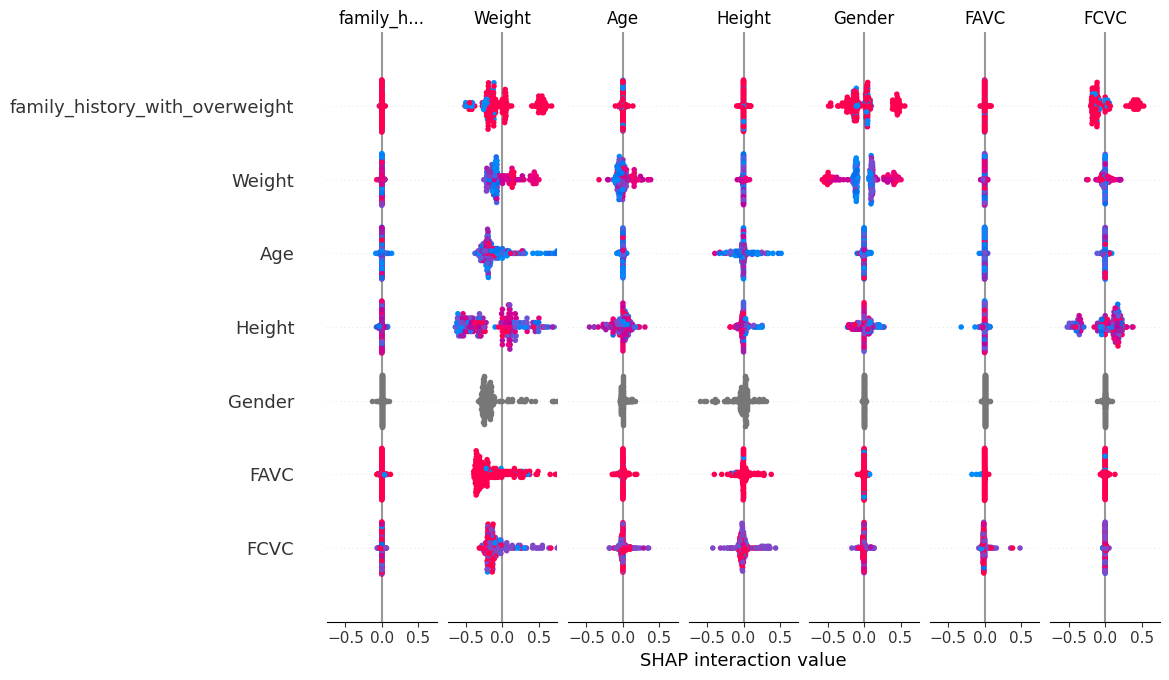

In [64]:
import shap
shap.initjs()  # safe to call again

# Global summary of feature importance across all explained test cases
shap.summary_plot(
    # for multiclass, this is a list (one per class)
    shap_values,
    X_explain,
    feature_names=X_explain.columns
)


### ✔ Colour codes for the SHAP plot above
Red = feature has a high value

Blue = feature has a low value

Purple / intermediate = medium value

Grey = categorical or binary (e.g., gender)

## Example SHAP for local XAI

In [65]:
class_names = list(predictor.class_labels)
print("Class names:", class_names)


Class names: ['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II']


### This block explains the model's prediction classes using SHAP and displays the most predictive factors for the case 9603

Explaining this test case:


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
9603,Female,21.695892,1.809871,149.935848,1,1,3.0,3.0,Sometimes,0,2.36651,0,1.995582,0.890527,Sometimes,Public_Transportation


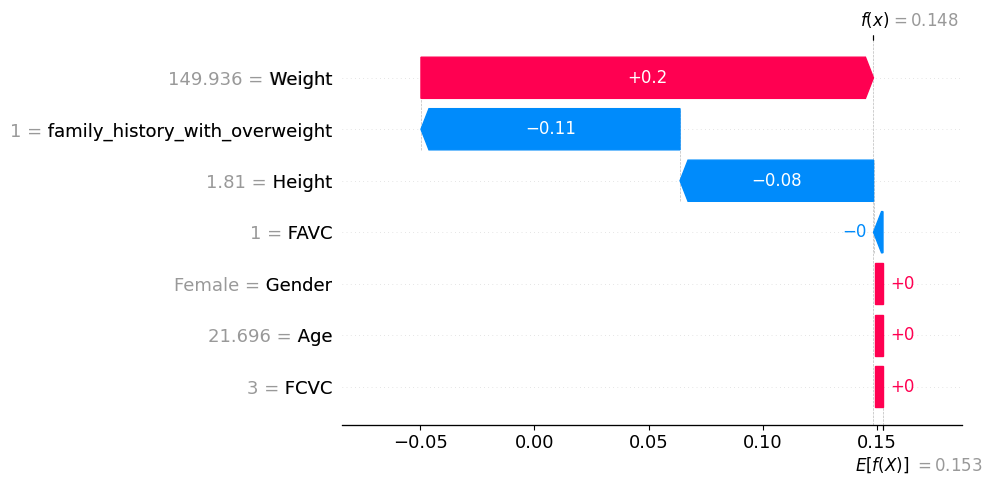

In [66]:
# Choose an index into X_explain
i = 0  # change 0..len(X_explain)-1

x_single = X_explain.iloc[i:i+1]
print("Explaining this test case:")
display(x_single)

# Choose class to explain
class_idx = 1  # choose based on class_names

single_shap = shap_values[class_idx][i]

shap.waterfall_plot(
    shap.Explanation(
        values=single_shap,
        base_values=explainer.expected_value[class_idx],
        data=x_single.values[0],
        feature_names=X_explain.columns
    )
)


## Save entire model on drive. Relevant files will be accessed and reloaded for interactive Streamlit user application.

Save model

In [67]:
import shutil
import os

# Source path where AutoGluon saved the model
source_model_path = predictor.path # This gets the path where the current predictor is saved

# Destination path in Google Drive
destination_model_path = '/content/drive/MyDrive/ObesityRiskPredictor/AutoGluon_Obesity_Model'

# Ensure the destination directory does not exist, or handle it as needed
# For simplicity, we'll remove it if it exists to ensure a clean copy
if os.path.exists(destination_model_path):
    print(f"Removing existing model directory in Drive: {destination_model_path}")
    shutil.rmtree(destination_model_path)

print(f"Copying model from {source_model_path} to {destination_model_path}")
shutil.copytree(source_model_path, destination_model_path)

print("Model saved successfully to Google Drive!")
print(f"You can find your model at: {destination_model_path}")

Removing existing model directory in Drive: /content/drive/MyDrive/ObesityRiskPredictor/AutoGluon_Obesity_Model
Copying model from /content/AutogluonModels/ag-20251201_165626 to /content/drive/MyDrive/ObesityRiskPredictor/AutoGluon_Obesity_Model
Model saved successfully to Google Drive!
You can find your model at: /content/drive/MyDrive/ObesityRiskPredictor/AutoGluon_Obesity_Model


Confirm whether my model is saved

In [69]:
import os

save_dir = "/content/drive/MyDrive/ObesityRiskPredictor/AutoGluon_Obesity_Model/"
os.makedirs(save_dir, exist_ok=True)
print("Directory ready:", save_dir)

# Save train_df
train_path = save_dir + "train_df.csv"
train_df.to_csv(train_path, index=False)
print("Saved train_df to:", train_path)

# Save test_df
test_path = save_dir + "test_df.csv"
test_df.to_csv(test_path, index=False)
print("Saved test_df to:", test_path)

Directory ready: /content/drive/MyDrive/ObesityRiskPredictor/AutoGluon_Obesity_Model/
Saved train_df to: /content/drive/MyDrive/ObesityRiskPredictor/AutoGluon_Obesity_Model/train_df.csv
Saved test_df to: /content/drive/MyDrive/ObesityRiskPredictor/AutoGluon_Obesity_Model/test_df.csv


## Streamlit  clinician-in-the-loop

In this next section, we develop an interactive UI as an app using Streamlit where users (clinicans) can give feedback. Thus the user can accept, reject or overide model recommendation and assign reason(s), where required.

Locally explainable AI and LIME are integrated to aid clinical understanding.

### Use token from ngrok to initialize Streamlit

In [123]:
from pyngrok import ngrok

# Set your ngrok authtoken
ngrok.set_auth_token("365TUcvZREwRK1LxOXwzxxMgmfU_5GowxUoGcvZF9Kj8CKzpq")

print("ngrok authentication set successfully!")


ngrok authentication set successfully!


### Define the directory for saving Streamlit app

In [124]:
import torch

if torch.cuda.is_available():
    print(f"CUDA is available! Using GPU: {torch.cuda.get_device_name(0)}")
else:
    print("CUDA is not available. AutoGluon might be running on CPU.")


CUDA is available! Using GPU: NVIDIA A100-SXM4-80GB


## Start streaming

In [125]:
%%writefile /content/app_obesity.py
import os
import numpy as np
import pandas as pd
import streamlit as st
from datetime import datetime

from autogluon.tabular import TabularPredictor
from sklearn.metrics import accuracy_score, balanced_accuracy_score

# Access files
# ============================================================
# ---------------- CONFIG / PATHS ----------------------------
# ============================================================
LABEL = "0be1dad"

MODEL_PATH = "/content/drive/MyDrive/ObesityRiskPredictor/AutoGluon_Obesity_Model"
TRAIN_CSV  = "/content/drive/MyDrive/ObesityRiskPredictor/AutoGluon_Obesity_Model/train_df.csv"
TEST_CSV   = "/content/drive/MyDrive/ObesityRiskPredictor/AutoGluon_Obesity_Model/test_df.csv"

FEEDBACK_CSV = "./user_feedback_obesity.csv"

# ============================================================
# ----------------- HELPERS ----------------------------------
# ============================================================

def load_predictor():
    return TabularPredictor.load(MODEL_PATH)

def load_data():
    train = pd.read_csv(TRAIN_CSV)
    test  = pd.read_csv(TEST_CSV)
    X_test = test.drop(columns=[LABEL])
    y_test = test[LABEL]
    return train, test, X_test, y_test

def is_numeric(series: pd.Series) -> bool:
    return pd.api.types.is_numeric_dtype(series)

def compute_local_explanation(
    predictor: TabularPredictor,
    x0: pd.Series,
    X_all: pd.DataFrame,
    class_label,
    top_k: int = 10,
):
    """
    Local XAI:
    For the selected case x0, perturb one feature at a time and
    measure the change in predicted probability for class_label.
    Returns a DataFrame with feature, delta_prob, abs_delta.
    """
    base_df = pd.DataFrame([x0])
    proba_df = predictor.predict_proba(base_df)

    if class_label not in proba_df.columns:
        # Raise with a very explicit message so Streamlit can show it
        raise ValueError(
            f"class_label '{class_label}' not found in predict_proba columns. "
            f"predict_proba columns: {list(proba_df.columns)}. "
            "This usually means there is a mismatch between the label values "
            "in y_test and the class names used by predict_proba."
        )

    base_proba = float(proba_df[class_label].iloc[0])
    deltas = {}

    for feat in X_all.columns:
        col = X_all[feat]
        x_val = x0[feat]

        # Numeric: nudge value a bit within 5–95th percentile
        if is_numeric(col):
            if col.nunique() <= 1:
                continue
            q_low, q_high = col.quantile([0.05, 0.95])
            if q_low == q_high:
                q_low, q_high = col.min(), col.max()
            step = (q_high - q_low) / 10.0
            if step == 0:
                continue
            new_val = x_val + step
            new_val = min(max(new_val, q_low), q_high)
        else:
            # Categorical: switch to most frequent *different* category
            vc = col.value_counts()
            if vc.empty:
                continue
            candidates = [c for c in vc.index if c != x_val]
            if not candidates:
                continue
            new_val = candidates[0]

        mod_df = base_df.copy()
        mod_df[feat] = new_val
        proba_new = float(predictor.predict_proba(mod_df)[class_label].iloc[0])
        deltas[feat] = proba_new - base_proba

    if not deltas:
        # No usable perturbations
        return pd.DataFrame(columns=["feature", "delta_prob", "abs_delta"])

    df = pd.DataFrame(
        {"feature": list(deltas.keys()), "delta_prob": list(deltas.values())}
    )
    df["abs_delta"] = df["delta_prob"].abs()
    df = df.sort_values("abs_delta", ascending=False).head(top_k)
    return df

def find_contrastive_case(
    x0: pd.Series,
    X_all: pd.DataFrame,
    y_all: pd.Series,
    y0,
):
    """
    Contrastive XAI:
    Find the closest case (Euclidean distance on numeric features)
    that has a DIFFERENT label from y0.
    Returns (x_cf, y_cf) or (None, None).
    """
    numeric_cols = [c for c in X_all.columns if is_numeric(X_all[c])]
    if not numeric_cols:
        return None, None, "No numeric features available to compute distances."

    X_num = X_all[numeric_cols].astype(float)
    x0_num = x0[numeric_cols].astype(float)

    mask_other_class = (y_all != y0)
    if not mask_other_class.any():
        return None, None, (
            "All cases in the test set have the same label as the current case. "
            "No different-class neighbor exists."
        )

    X_other = X_num[mask_other_class]
    y_other = y_all[mask_other_class]

    diffs = X_other - x0_num
    dists = np.sqrt((diffs ** 2).sum(axis=1))

    idx_min = dists.idxmin()
    x_cf = X_all.loc[idx_min]
    y_cf = y_other.loc[idx_min]

    return x_cf, y_cf, None

def append_feedback(row_dict):
    """Append feedback to CSV (create file if missing) with timestamp."""
    now = datetime.now()
    row_dict["timestamp"] = now.isoformat(timespec="seconds")
    df_new = pd.DataFrame([row_dict])
    if os.path.exists(FEEDBACK_CSV):
        df_old = pd.read_csv(FEEDBACK_CSV)
        df_all = pd.concat([df_old, df_new], ignore_index=True)
    else:
        df_all = df_new
    df_all.to_csv(FEEDBACK_CSV, index=False)

# ============================================================
# --------------------- STREAMLIT APP ------------------------
# ============================================================

st.set_page_config(
    page_title="Obesity Risk CDSS",
    page_icon="🩺",
    layout="wide"
)

st.title("🩺 Obesity Risk Predictor – Explainable Clinical Viewer")

st.markdown(
    """
This interface allows you to:

- Review **model performance** on the held-out test set.
- Inspect **individual cases** (features, ground truth, prediction, probabilities).
- Provide **expert feedback** on the model's predictions.
- View **Explainable AI (XAI)**:
  - **Local what-if explanation** – which features most change this case's prediction.
  - **Contrastive explanation** – closest case with a *different* BMI category.
"""
)

# ---------- Load model & data -------------------------------
try:
    predictor = load_predictor()
    train_df, test_df, X_test, y_test = load_data()
except Exception as e:
    st.error(f"Error loading model or data: {e}")
    st.stop()

n_cases = len(X_test)

# ----------------- SIDEBAR CONTROLS --------------------------
st.sidebar.title("⚙️ Controls")

st.sidebar.markdown("### 🔎 Case selection")
idx = st.sidebar.number_input(
    "Index of test-set case",
    min_value=0,
    max_value=max(n_cases - 1, 0),
    value=0,
    step=1,
)

st.sidebar.markdown("---")
debug_mode = st.sidebar.checkbox("Show debug info", value=False)

# ----------------- PERFORMANCE SECTION ----------------------
st.markdown("## 📊 Model performance on test set")

try:
    y_pred = predictor.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    bal_acc = balanced_accuracy_score(y_test, y_pred)
except Exception as e:
    st.error(f"Error computing performance metrics: {e}")
    st.stop()

perf_col1, perf_col2, perf_col3 = st.columns([1, 1, 2])
with perf_col1:
    st.metric("Accuracy", f"{acc:.3f}")
with perf_col2:
    st.metric("Balanced accuracy", f"{bal_acc:.3f}")
with perf_col3:
    st.info(
        "Balanced accuracy accounts for all BMI classes equally, which is important if\n"
        "some categories (e.g., severe obesity or underweight) are less frequent."
    )

if debug_mode:
    st.write("DEBUG – First 5 labels in y_test:", y_test.head().tolist())

st.markdown("---")

# ================= CASE + TABS LAYOUT =======================
idx_int = int(idx)
x0 = X_test.iloc[idx_int]
x0_df = X_test.iloc[[idx_int]]
true_label = y_test.iloc[idx_int]
pred_label = y_pred.iloc[idx_int]
proba_row = predictor.predict_proba(x0_df).iloc[0]

if debug_mode:
    st.write("DEBUG – proba_row index (class names):", list(proba_row.index))
    st.write("DEBUG – true_label:", true_label, type(true_label))
    st.write("DEBUG – pred_label:", pred_label, type(pred_label))

st.markdown(f"## Case {idx_int} – Review & Explain")

tabs = st.tabs([" Case & Prediction", "Local XAI", "🧬 Contrastive XAI"])

# ------------- TAB 1: CASE & PREDICTION ---------------------
with tabs[0]:
    st.markdown("### Case details and prediction")

    c1, c2 = st.columns([2, 1])

    with c1:
        st.markdown("**Feature values for this case**")
        st.dataframe(x0_df)

    with c2:
        st.markdown("**Prediction summary**")
        st.write(f"**True BMI category:** `{true_label}`")
        st.write(f"**Model-predicted category:** `{pred_label}`")
        st.write("**Class probabilities:**")
        st.dataframe(proba_row.to_frame("Probability"))

    st.markdown("---")
    st.markdown("### 🗣️ Expert feedback")

    if "submitted" not in st.session_state:
        st.session_state.submitted = False

    with st.form("fb_form"):
        decision = st.radio(
            "How do you judge this prediction?",
            [
                "Accept (model prediction is correct)",
                "Reject (model prediction is incorrect)",
                "Override (provide a different class)"
            ],
            index=0
        )

        override = None
        if decision.startswith("Override"):
            override = st.selectbox("Select the correct class:", sorted(y_test.unique()))

        reason = st.text_area(
            "Reason / comments (optional but recommended):",
            placeholder="e.g. recent weight change, comorbidities, measurement error, etc."
        )

        submit = st.form_submit_button("Submit feedback")

    if submit:
        append_feedback({
            "idx": idx_int,
            "actual": true_label,
            "predicted": pred_label,
            "decision": decision,
            "override": override,
            "reason": reason
        })
        st.session_state.submitted = True
        st.success("✅ Feedback saved for this case")

# ------------- TAB 2: LOCAL XAI -----------------------------
with tabs[1]:
    st.markdown("### 🧠 Local what-if explanation")

    class_names = list(proba_row.index)
    if pred_label in class_names:
        default_idx = class_names.index(pred_label)
    else:
        default_idx = 0
        st.warning(
            "The predicted label is not among predict_proba columns. "
            "This may indicate a label encoding mismatch. "
            "Using the first class in predict_proba instead."
        )

    class_to_explain = st.selectbox(
        "Class to explain",
        options=class_names,
        index=default_idx,
        help="Choose which BMI category's probability you want to analyse."
    )

    st.write(f"Base probability for `{class_to_explain}`:", float(proba_row[class_to_explain]))

    try:
        local_exp_df = compute_local_explanation(
            predictor=predictor,
            x0=x0,
            X_all=X_test,
            class_label=class_to_explain,
            top_k=10,
        )
    except Exception as e:
        st.error("❌ Error while computing local XAI.")
        st.write("**Details for debugging / corrective action:**")
        st.code(str(e))
        st.write("- Check that the label values in `y_test` match the columns returned by `predict_proba`.")
        st.write("- If `y_test` uses integers (0–6) but `predict_proba` columns are strings like `'Normal_Weight'`, or vice versa, you need to align them.")
        if debug_mode:
            st.write("DEBUG – proba_row index:", list(proba_row.index))
            st.write("DEBUG – sample y_test values:", y_test.head().tolist())
        st.stop()

    st.write("Local XAI table (top features by change in probability):")
    st.dataframe(local_exp_df)

    if local_exp_df.empty:
        st.info(
            "No meaningful perturbations could be generated for this case. "
            "This can happen if most features are constant or have very little variation. "
            "Corrective action: check the distribution of features in the test set "
            "to ensure there is enough variability."
        )
    else:
        plot_df = local_exp_df.set_index("feature")[["delta_prob"]]
        st.bar_chart(plot_df)

        st.markdown(
            f"""
- Bars **above zero**: increasing/changing that feature in the tested way
  would **increase** the model's probability for **`{class_to_explain}`**.
- Bars **below zero**: would **decrease** that probability.

If the plot looks strange or flat, corrective actions might include:
- Checking feature scaling and distributions.
- Verifying that the model actually uses those features (e.g., feature importance).
"""
        )

# ------------- TAB 3: CONTRASTIVE XAI -----------------------
with tabs[2]:
    st.markdown("### 🧬 Contrastive explanation (nearest different-class case)")

    x_cf, y_cf, cf_msg = find_contrastive_case(
        x0=x0,
        X_all=X_test,
        y_all=y_test,
        y0=true_label
    )

    if x_cf is None:
        st.info(
            "Could not compute a contrastive case for this individual.\n\n"
            f"Reason: {cf_msg}\n\n"
            "Corrective actions:\n"
            "- Ensure there are multiple BMI categories present in the test set.\n"
            "- Ensure at least some numeric features exist and vary across individuals."
        )
    else:
        st.write(f"Nearest different-class case has label: `{y_cf}`")

        cf_df = pd.DataFrame({
            "Current case": x0,
            "Contrastive case": x_cf
        })
        st.dataframe(cf_df)

        st.markdown(
            "Differences between these columns highlight features that may be clinically important "
            "for distinguishing between BMI categories in similar individuals.\n\n"
            "If the contrastive case seems too far or not clinically plausible, you may:\n"
            "- Restrict the distance search (e.g., only within a certain age or BMI window).\n"
            "- Engineer additional features that better capture the clinical profile."
        )


Overwriting /content/app_obesity.py


### ### Caption: Start and Expose Streamlit App


This code block initiates the Streamlit application in the background and establishes a public URL using `ngrok`, enabling access to the interactive web interface. It also displays the most recent logs from the Streamlit app for monitoring.

In [126]:
from pyngrok import ngrok

ngrok.kill()

# Start Streamlit in background
!streamlit run /content/app_obesity.py --server.port 8501 --server.address 0.0.0.0 > /content/log.txt 2>&1 &

import time; time.sleep(5)

public_url = ngrok.connect(8501)
print("CLICK THIS URL:", public_url.public_url)

!tail -n 20 /content/log.txt


CLICK THIS URL: https://uncontradictablely-groovier-alphonse.ngrok-free.dev


2025-12-02 00:09:43.466 Port 8501 is already in use


## Conclusion

We have successfully developed a machine learning using autogluon with an interactive Streamlit app for clinical relevance. This is a good project which can be further enhanced or developed.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------
# 1. AUC + test_accuracy tables
# ------------------------------
df_auc = pd.DataFrame({
    "model": [
        "LightGBMXT_BAG_L2", "LightGBM_BAG_L2", "WeightedEnsemble_L3",
        "ExtraTreesGini_BAG_L2_FULL", "XGBoost_r33_BAG_L1_FULL",
        "LightGBMLarge_BAG_L2", "XGBoost_r33_BAG_L1",
        "CatBoost_r9_BAG_L1_FULL", "XGBoost_BAG_L2", "XGBoost_BAG_L1"
    ],
    "AUC": [
        0.991364, 0.990861, 0.992028, 0.990488, 0.991461,
        0.989349, 0.991504, 0.991991, 0.990716, 0.991621
    ]
})

df_test = pd.DataFrame({
    "model": [
        "LightGBMXT_BAG_L2", "LightGBM_BAG_L2", "WeightedEnsemble_L3",
        "ExtraTreesGini_BAG_L2_FULL", "XGBoost_r33_BAG_L1_FULL",
        "LightGBMLarge_BAG_L2", "XGBoost_r33_BAG_L1",
        "CatBoost_r9_BAG_L1_FULL", "XGBoost_BAG_L2", "XGBoost_BAG_L1"
    ],
    "test_accuracy": [
        0.903820, 0.903219, 0.902981, 0.902392, 0.902232,
        0.902113, 0.901999, 0.901854, 0.901757, 0.901374
    ]
})

# ------------------------------------------
# 2. Concatenate into ONE clean table
# ------------------------------------------
df_combined = (
    pd.merge(df_test, df_auc, on="model", how="inner")
      .sort_values(by="test_accuracy", ascending=False)
      .reset_index(drop=True)
)

# Optional: round for nicer display
df_combined_rounded = df_combined.copy()
df_combined_rounded[["test_accuracy", "AUC"]] = \
    df_combined_rounded[["test_accuracy", "AUC"]].round(4)

print("\n=== Combined Performance Table (Test Accuracy + AUC) ===\n")
print(df_combined_rounded)

# If you want it in markdown format for reports:
try:
    from tabulate import tabulate
    print("\nMarkdown table:\n")
    print(tabulate(df_combined_rounded, headers="keys",
                   tablefmt="github", showindex=False))
except ImportError:
    pass


In [ ]:
# ------------------------------------------
# 3. Grouped bar plots for Accuracy & AUC
# ------------------------------------------
models = df_combined["model"].values
x = np.arange(len(models))
width = 0.35  # bar width

fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(x - width/2, df_combined["test_accuracy"],
       width, label="Test Accuracy")
ax.bar(x + width/2, df_combined["AUC"],
       width, label="Multiclass AUC")

ax.set_xticks(x)
ax.set_xticklabels(models, rotation=70, ha="right")
ax.set_ylabel("Score")
ax.set_title("Test Accuracy and AUC for Top Obesity Risk Models")
ax.legend()
ax.grid(axis="y", linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()